 ## Statistics_t-test
 
    최초 작성일 : 2020/03/05
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        - Shapiro-Wilks test : 정규성 검정

        - t-test : 독립 표본, 대응 표본, 단일 표본

    두 그룹의 평균 비교

- T-test(=student T-test, Independent T-test) : 모수적 방식


- Mann-Whitney U Test(=Wilcoxen rank-sum test, Mann-Whitney-Wilcoxen test(MWW)) : 비모수적 방식


- Welch's T-Test


    < T-test 사용 조건 >
    
    : 결과값이 연속변수 여부
        연속변수이면, T-test
        연속변수 아니면, Mann-Whitney U Test
    
    : 정규 분포 여부
        정규분포이면, T-test
        정규분포 아니면, Mann-Whitney U test
        
    : 등분산 여부
        등분산이면, T-test
        등분산 아니면, Welch's T-test

### Shapiro-Wilks test : 정규성 검정

    주어진 자료가 있을 때, 그 자료의 데이터들이 정규분포를 따르는지 검정하는 방법
    
    통계의 여러 검정법들은 데이터의 정규분포를 가정하고 수행 됨
    
    따라서 데이터 자체에 대한 정규성 검정 진행이 필요
    
    만약 자료가 정규성을 만족하지 않는다면 분석 결과에 대한 타당성이 떨어짐
    
    - 정규성 검정 종류
      : Shpiro-Wilks test, Kolmogorove-Smirnov test, Quantile-Quantile plot

In [36]:
# 가정 : 미국 여자 성인들의 몸무게는 정규분포를 따른다
## 귀무가설 : 정규분포를 따른다
## 대립가설 : 정규분포를 따르지 않는다

# 정규성 검정
shapiro.test(women$weight)


	Shapiro-Wilk normality test

data:  women$weight
W = 0.96036, p-value = 0.6986


#### 정규성 검정 해석 결과

    - p-value = 0.6986
      : 0.05보다 크기 때문에 귀무가설 채택
      : 정규분포를 따른다고 볼 수 있음

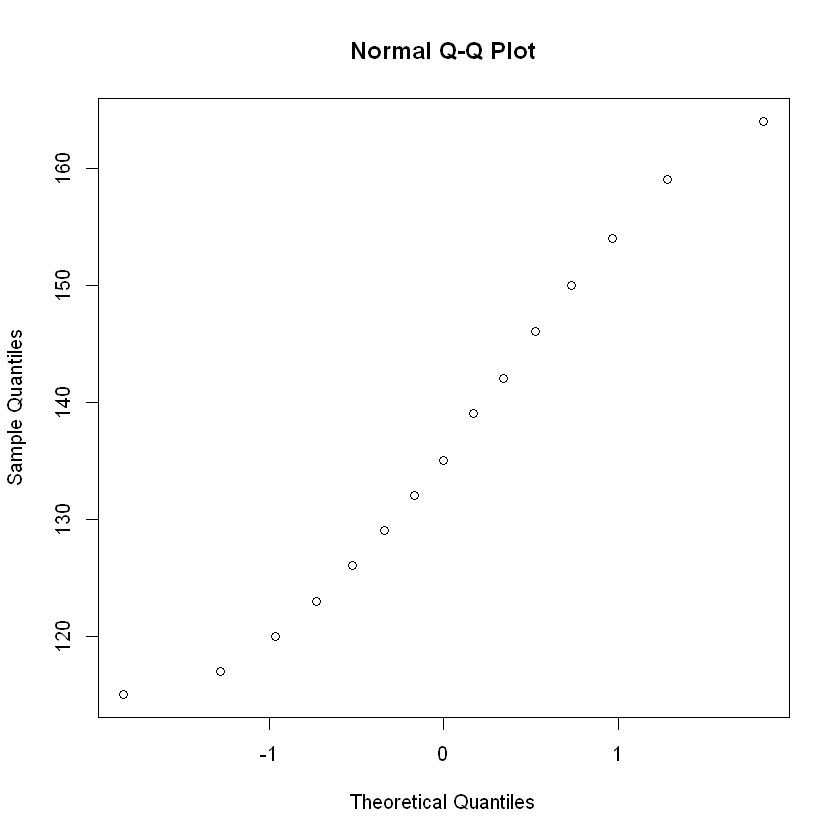

In [81]:
# 정규분포 같네...
qqnorm(women$weight)

In [40]:
# 가정 : Petal.Length(꽃의 꽃잎의 길이) 정규분포를 따른다.
## 귀무가설 : 정규분포를 따른다
## 대립가설 : 정규분포를 따르지 않는다

# 정규성 검정
shapiro.test(iris$Petal.Length)


	Shapiro-Wilk normality test

data:  iris$Petal.Length
W = 0.87627, p-value = 7.412e-10


#### 정규성 검정 해석 결과

    - p-value = 7.412e-10
      : 0.05보다 작기 때문에 대립가설 채택
      : 정규분포를 따르지 않음

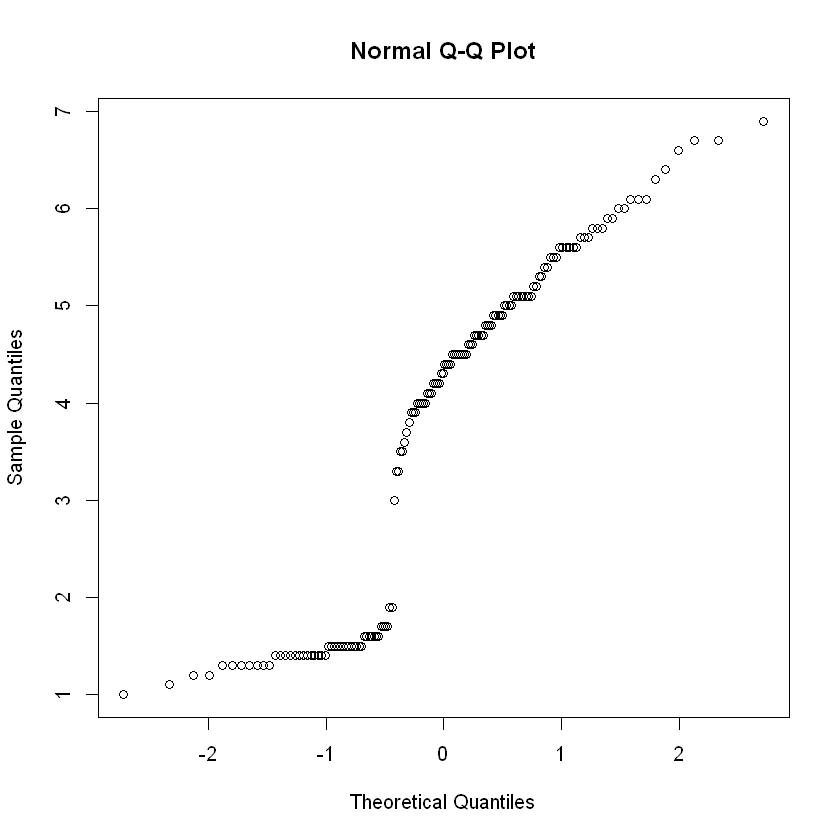

In [82]:
# 정규분포 아니네... 휘어진거봐...
qqnorm(iris$Petal.Length)

## 독립표본 t-test (Independent two sample t-test)

    - 독립적이기 위해 만족해야할 조건
    : 두 개의 표본이 서로 관계 없는 모집단에서 추출 될 것
    : 표본 간에는 아무런 관계가 없을 것
    
    - var.test
    : 등분산성 만족 여부 확인
    : p-value값 0.05보다 크면 등분산성 만족O
      p-value값 0.05보다 작으면 등분산성 만족X
      
    - t.test 방법
    : 분석을 원하는 두 집단의 평균을 각각 별개의 벡터 객체로 만들어 입력
      t.test(group1의 관측치, group2의 관측치, t-test유형, 신뢰범위)
      
    : 하나의 데이터 프레임에서 집단을 구분하고자 하는 기준을 입력
      t.test(관측치 ~  집단 구분 기준, 데이터프레임, t-test유형, 신뢰범위)
      

In [11]:
# Q : 자동차 기어 종류(am, 0=오토, 1=수동)에 따른 mpg의 차이가 통계적으로 유의한가?

# str(mtcars) # 11개의 변수가 있는 32개의 관측 데이터
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [18]:
# 두 표본의 등분산성 확인

var.test(mtcars$mpg[mtcars$am==1], mtcars$mpg[mtcars$am==0])

# p-value = 0.06691로 0.05보다 큼
# 등분산성 만족


	F test to compare two variances

data:  mtcars$mpg[mtcars$am == 1] and mtcars$mpg[mtcars$am == 0]
F = 2.5869, num df = 12, denom df = 18, p-value = 0.06691
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.934280 8.040391
sample estimates:
ratio of variances 
          2.586911 


In [19]:
# t.test(group1의 관측치, group2의 관측치, t-test유형, 신뢰범위)

t.test(mtcars$mpg[mtcars$am==1], mtcars$mpg[mtcars$am==0], 
       paired=FALSE, var.equal=TRUE, conf.level=0.95)
## 독립표본 t-test의 경우 
## t-test 유형 : var.equal = True / 신뢰범위는 default로 0.95로 지정되어있음


	Two Sample t-test

data:  mtcars$mpg[mtcars$am == 1] and mtcars$mpg[mtcars$am == 0]
t = 4.1061, df = 30, p-value = 0.000285
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  3.64151 10.84837
sample estimates:
mean of x mean of y 
 24.39231  17.14737 


In [20]:
# t.test(관측치 ~  집단 구분 기준, 데이터프레임, t-test유형, 신뢰범위)

t.test(mpg ~ am, data=mtcars, var.equal=TRUE, conf.level = 0.95)


	Two Sample t-test

data:  mpg by am
t = -4.1061, df = 30, p-value = 0.000285
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.84837  -3.64151
sample estimates:
mean in group 0 mean in group 1 
       17.14737        24.39231 


#### 독립표본 t.test 결과 해석

    - 아래쪽 집단 별 mpg 평균
      : 오토는 17.14, 수동은 24.39
      : 평균 차이가 있음을 알 수 있다
      
    - 위 평균 차가 유의한지 판단하기 위해서는 p-value 확인
      : p-value = 0.000285
      : 0.05 이하이므로 오토와 수동 자동차의 mpg 차이는 유의하다고 볼 수 있음
      

## 대응표본 t-test (Paired sample t-test)

    동일한 집단의 전-후 차이 비교하기 위해 사용
    
    특정 변인의 영향을 측정하기 위해 사용
    
    ex) 초콜렛 섭취 전후에 다른 수면 시간에 미치는 영향 알아보기
    
    주의할 점 : 실험 전-후를 비교하는 것이기 때문에 입력하는 관측치의 수가 반드시 같아야 함

In [24]:
# 중간고사 이후 과외 받은 10명의 학생의 중간고사 -기말고사 점수 데이터

# 데이터 준비
mid <- c(16, 20, 21, 22, 23, 22, 27, 25, 27, 28)
final <- c(19, 22, 24, 24, 25, 25, 26, 26, 28, 32)

# 대응표본 t-test
t.test(mid, final, paired = TRUE)


	Paired t-test

data:  mid and final
t = -4.4721, df = 9, p-value = 0.00155
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.0116674 -0.9883326
sample estimates:
mean of the differences 
                     -2 


#### 대응표본 t-test 결과 해석

    - p-value = 0.00155
     : 0.05보다 작은 값을 가짐
     : 과외를 받은 저과 이후의 평균 성적 차이는 통계적으로 유의미 하다고 볼 수 있음

## 단일표본 t-test(One sample t-test)

    한 집단의 평균이 특정 기준보다 유의미하게 다른지
    
    혹은 큰지/작은지 알아본느 분석 방법
    
    - 문법
    t.test(관측치, alternative = 판별 방향, mu = 특정기준, conf.level = 신뢰수준)
    
    : alternative 에는 "greater", "less", "two.sided" 있음
      각각 큰지, 작은지, 같은지 를 구분하라는 명령

In [32]:
# 기말고사 점수가 24점보다 유의하게 높은가?
## 귀무가설 : 24점보다 유의하게 높다
## 대립가설 : 24점보다 유의하게 높지 않다

# 데이터 
final2 <- c(19, 22, 24, 24, 25, 25, 26, 26, 28, 32)

# 기말고사 평균 점수
mean_final2 <- mean(final2)
mean_final2

[1] 25.1

In [34]:
# 단일 표본 t-test

t.test(final2, alternative="greater", mu=24, conf.level=.95)


	One Sample t-test

data:  final2
t = 1.0093, df = 9, p-value = 0.1696
alternative hypothesis: true mean is greater than 24
95 percent confidence interval:
 23.10218      Inf
sample estimates:
mean of x 
     25.1 


#### 단일 표본 t-test 결과 해석

    - p-value = 0.1696
      : 0.05보다 큼
      : 귀무가설X, 대립가설O
      : 95% 신뢰수준에서 학생들의 기말고사 성적은 24점보다 유의적으로 높지 않다.

< 출처 >

https://urosie.tistory.com/107

http://www.dodomira.com/2016/04/02/r%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-t-test/

## 예시1. 건전지 수명

In [51]:
# 단일표본(1개의 집단) t-test 예시

# A회사의 건전지 수명이 1000시간일 때, 무작위로 뽑은 10개의 건전지 수명에 대해 
# 샘플이 모집단과 다르다고 할 수 있는가?
## 귀무가설 : 모집단의 평균과 같다
## 대립가설 : 모집단의 평균과 다르다

# 데이터 준비
battery <- c(980, 1008, 968, 1032, 1012, 1002, 996, 1017, 990, 955)

# 평균시간 구하기
mean_b <- mean(battery)
mean_b
# 1000시간과 별 차이가 없다 그러니 디테일하게 알아보자!

[1] 996

In [53]:
# 정규분포 여부 확인하기
## 귀무가설 : 정규분포O
## 대립가설 : 정규분포X

shapiro.test(battery)
# p-value = 0.9781
# p-value 0.05보다 크므로 귀무가설 성립. 정규분포O


	Shapiro-Wilk normality test

data:  battery
W = 0.98274, p-value = 0.9781


In [54]:
# 정규분포이므로 t.test로 검정 진행 / 모집단 평균 알고잇으니 mu 사용

t.test(battery, mu=1000)
# p-value = 0.602
# p-value 값이 0.05보다 크므로 수명 1000시간 맞다고 판단


	One Sample t-test

data:  battery
t = -0.54045, df = 9, p-value = 0.602
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  979.2573 1012.7427
sample estimates:
mean of x 
      996 


## 예시2. 학급 성적

In [56]:
# 단일표본(1개의 집단) t-test 예시

# 수업 전 한 학급의 수학 평균 성적은 55점
# 수업 진행후 학생들의 성적은 수업의 여부와 관계있는가?

# 데이터 준비
score <- c(58, 49, 39, 99, 32, 88, 62, 30, 55, 65, 44, 55, 57, 53, 88, 42, 39)

# 평균 알아보기
mean_s <- mean(score)
mean_s
# 55점보다 살짝 높넹  더 디테일하게 알아보자

[1] 56.17647

In [58]:
# 정규분포 여부 확인

shapiro.test(score)
# p-value = 0.1058
# p-value값이 0.05보다 크므로 t.test 사용 가능


	Shapiro-Wilk normality test

data:  score
W = 0.91143, p-value = 0.1058


In [60]:
# t.test 사용

t.test(score, mu=55, alternative = "greater")
# p-value = 0.4046
# p-value 0.05 이상이므로 귀무가설
# 성적이 올랐다고 하기에는 조금 아쉬운 값


	One Sample t-test

data:  score
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


## 예시3. 출생률

In [67]:
# 각도시별 출생률 나타내는 데이터 파일 
# 20개 도시 추출(우리나라 75개의 자치도시 중에 20개만 추출)
# 모집단의 평균 출산율은 1.37812

# 귀무 가설 : 20개 도시의 합계 출산율이 모집단의 합계 출산율과 같다
# 대립 가설 : 20개 도시의 합계 출산율이 모집단의 합계 출산율과 다르다 

mydata <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/onesample.csv")
str(mydata) # 3개의 변수에 20개의 데이터
head(mydata)

# 출산율 평균 알아보기
mean_birth <- mean(mydata$birth_rate)
mean_birth
# 모집단과 별로 차이가 안나는데.. detail하게 알아보자

'data.frame':	20 obs. of  3 variables:
 $ cities    : Factor w/ 20 levels "경기 고양시",..: 10 9 17 13 8 3 19 7 12 1 ...
 $ ID        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ birth_rate: num  1.29 1.16 1.1 1.18 1.07 ...


cities,ID,birth_rate
경기 수원시,1,1.292
경기 성남시,2,1.159
경기 의정부시,3,1.104
경기 안양시,4,1.177
경기 부천시,5,1.072
경기 광명시,6,1.235


[1] 1.24615

In [69]:
# 정규분포 검증

shapiro.test(mydata$birth_rate)
# p-value = 0.1538
# p-value값이 0.05보다 크므로 정규분포O


	Shapiro-Wilk normality test

data:  mydata$birth_rate
W = 0.92991, p-value = 0.1538


In [71]:
# t.test

t.test(mydata$birth_rate, mu=1.37812)
## p-value = 0.0001791
## p-value가 0.05보다 작으므로 대립가설 성립


	One Sample t-test

data:  mydata$birth_rate
t = -4.6387, df = 19, p-value = 0.0001791
alternative hypothesis: true mean is not equal to 1.37812
95 percent confidence interval:
 1.186604 1.305696
sample estimates:
mean of x 
  1.24615 


## 예시4. 자동차 연비

In [72]:
# 오토나 수동에 따라 연비가 같을까? 다를까? 
# am : 0은 오토, 1은 수동 / 연비는 mpg
# 귀무 가설 : 차이가 없다
# 대립 가설 : 차이가 있다 
str(mtcars)
head(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [73]:
# 평균 알아보기
auto.mean <- mean(mtcars$mpg[mtcars$am==0])
handle.mean <- mean(mtcars$mpg[mtcars$am==1])
cat(auto.mean, "/", handle.mean)
# 차이가 많이 나넹

17.14737 / 24.39231

In [76]:
# 일단 정규분포 여부 확인해보기

shapiro.test(mtcars$mpg[mtcars$am==0]) # p-value = 0.8987
shapiro.test(mtcars$mpg[mtcars$am==1]) # p-value =  0.5363
# 0 오토의 값은 매우높다
# 그래도 일단, p-value 0.05보다 크므로 정규분포O


	Shapiro-Wilk normality test

data:  mtcars$mpg[mtcars$am == 0]
W = 0.97677, p-value = 0.8987



	Shapiro-Wilk normality test

data:  mtcars$mpg[mtcars$am == 1]
W = 0.9458, p-value = 0.5363


In [78]:
# 등분산 여부 확인

var.test(mtcars$mpg[mtcars$am==0], mtcars$mpg[mtcars$am==1])
# p-value 0.06691 
# 0.05보다 크므로 등분산O


	F test to compare two variances

data:  mtcars$mpg[mtcars$am == 0] and mtcars$mpg[mtcars$am == 1]
F = 0.38656, num df = 18, denom df = 12, p-value = 0.06691
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1243721 1.0703429
sample estimates:
ratio of variances 
         0.3865615 


In [83]:
# t.test 확인

t.test(mpg ~ am, data=mtcars, var.test=T)
# 등분산일때 var.test=T 사용
# 만약, 등분산이 아니라면 var.test=F 사용

# p-value = 0.001374 
# p-value가 0.05보다 작으므로 대립가설 성립 / 오토나 수동에 따라 연비는 다르다


	Welch Two Sample t-test

data:  mpg by am
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean in group 0 mean in group 1 
       17.14737        24.39231 


## 예시5. ID

In [84]:
# 데이터 준비

pd <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/pairedData.csv")
str(pd)
head(pd)

'data.frame':	10 obs. of  3 variables:
 $ ID    : int  1 2 3 4 5 6 7 8 9 10
 $ before: num  200 191 193 213 241 ...
 $ After : num  393 393 345 393 434 ...


ID,before,After
1,200.1,392.9
2,190.9,393.2
3,192.7,345.1
4,213.0,393.0
5,241.4,434.0
6,196.9,427.9


In [85]:
# 데이터 구조 변경 함수
# 데이터를 long형으로 구조 변경(melt, cast)
library(reshape2)

Warning message:
"package 'reshape2' was built under R version 3.6.2"

In [86]:
# 데이터 구조 변경하기
# 데이터가 서로 다른 컬럼에 위치해있다
# 데이터를 long형으로(같은 컬럼에 위치해있도록) 구조 변경

melt(pd, id=("ID"), variable.name = "GROUP", value.name = "RESULT")
# id 기준값, 나머진 이름변수, 변수 이름

ID,GROUP,RESULT
1,before,200.1
2,before,190.9
3,before,192.7
4,before,213.0
5,before,241.4
6,before,196.9
7,before,172.2
8,before,185.5
9,before,205.2
10,before,193.7


In [87]:
# gather 함수
# install.packages("tidyr")
library(tidyr)

# gather() : wide형식에서 long형식으로 전환
# spread() : long형식에서 중간 혹은 wide 형식으로 전환

Warning message:
"package 'tidyr' was built under R version 3.6.3"
Attaching package: 'tidyr'

The following object is masked from 'package:reshape2':

    smiths



In [88]:
# 데이터 형태 변환

pd2 <- gather(pd, key="GROUP", value = "RESULT", -ID)
pd2

# 아항 저 -해주는게 아예 필요없는 컬럼은 앞으로 아예 빼주는구낭...
# 그래서 key, value 값만 남게 해주네 오케이이이이

ID,GROUP,RESULT
1,before,200.1
2,before,190.9
3,before,192.7
4,before,213.0
5,before,241.4
6,before,196.9
7,before,172.2
8,before,185.5
9,before,205.2
10,before,193.7


In [89]:
# 정규분포 여부 확인

shapiro.test(pd2$RESULT[pd2$GROUP=="before"]) # p-value = 0.2768
shapiro.test(pd2$RESULT[pd2$GROUP=="After"]) # p-value = 0.2894

# p-value 0.05보다 크므로 정규분포O


	Shapiro-Wilk normality test

data:  pd2$RESULT[pd2$GROUP == "before"]
W = 0.90938, p-value = 0.2768



	Shapiro-Wilk normality test

data:  pd2$RESULT[pd2$GROUP == "After"]
W = 0.91121, p-value = 0.2894


In [91]:
# 등분산 여부 확인

var.test(pd2$RESULT[pd2$GROUP=="before"], pd2$RESULT[pd2$GROUP=="After"])
# p-value 0.05보다 크므로 등분산0


	F test to compare two variances

data:  pd2$RESULT[pd2$GROUP == "before"] and pd2$RESULT[pd2$GROUP == "After"]
F = 0.39488, num df = 9, denom df = 9, p-value = 0.1825
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.09808242 1.58978163
sample estimates:
ratio of variances 
         0.3948793 


In [92]:
# 정규분포니까 t.test해보자

t.test(pd2$RESULT ~ pd2$GROUP, data=pd2, paired=T)
# 등분산이므로 paired=T

# p-value = 6.2e-09 
# p-value가 0.05보다 작으므로 대립가설 채택 / 전후 차이가 있다


	Paired t-test

data:  pd2$RESULT by pd2$GROUP
t = 20.883, df = 9, p-value = 6.2e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 173.4219 215.5581
sample estimates:
mean of the differences 
                 194.49 


In [95]:
# 그래프로 시각화 시키기

# densityplot(pd2$RESULT ~ pd2$GROUP, data=pd2)
# 하나의 독립적인 변수에만 사용가능해서 사용할 수 없다

# 그러므로 하나씩 뽑아서 쓰자!!

before <- subset(pd2, GROUP=="before", RESULT)
before

after <- subset(pd2, GROUP=="After", RESULT)
after

RESULT
200.1
190.9
192.7
213.0
241.4
196.9
172.2
185.5
205.2
193.7


,RESULT
11,392.9
12,393.2
13,345.1
14,393.0
15,434.0
16,427.9
17,422.0
18,383.9
19,392.3
20,352.2


In [97]:
# 한쌍의 데이터를 전문적으로 처리하는 패키지
# install.packages("PairedData")
library(PairedData)

Warning message:
"package 'PairedData' was built under R version 3.6.3"Loading required package: MASS
Loading required package: gld
Warning message:
"package 'gld' was built under R version 3.6.2"Loading required package: mvtnorm
Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:moonBook':

    densityplot

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Attaching package: 'PairedData'

The following object is masked from 'package:base':

    summary



In [99]:
# 합치기
# 근데 이럴거면 그냥 원본꺼 가져와도 되는거 아니냥...
# 일단 쓰라니까 써보자

pd3 <- paired(before, after)
pd3

before,after
200.1,392.9
190.9,393.2
192.7,345.1
213.0,393.0
241.4,434.0
196.9,427.9
172.2,422.0
185.5,383.9
205.2,392.3
193.7,352.2


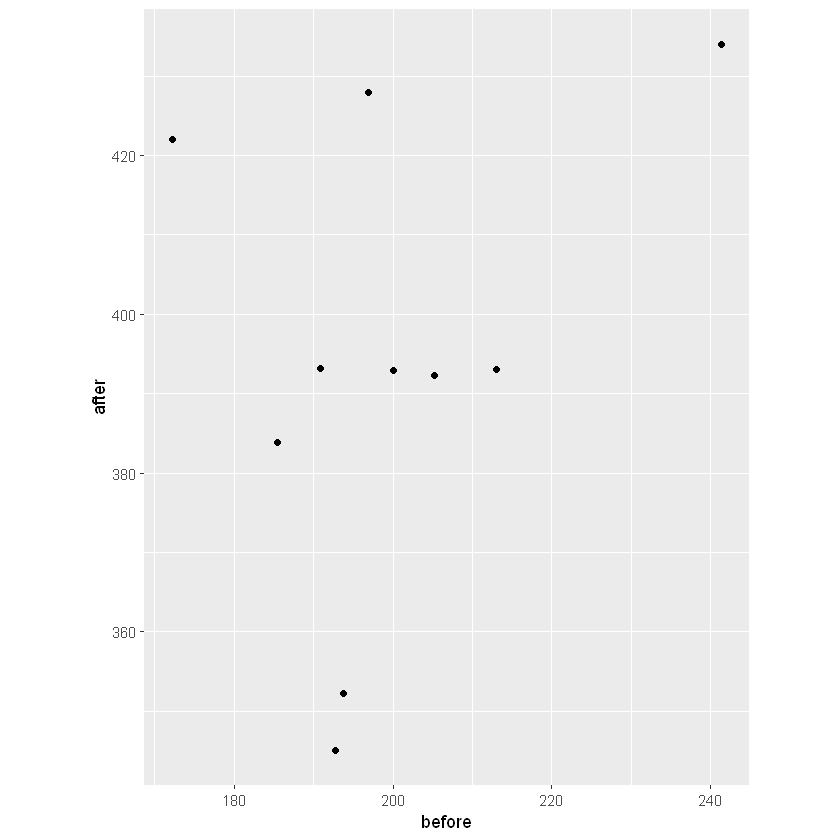

In [100]:
# 그래프로 나타내기
plot(pd3, type="profile" + theme_bw())

# 이그래프가 그래서 뭐 어쨌다는걸까....?
# 연관성이 있기는 하는건가...?
# 해석해주실분...?